# Read climate data ( NetCDF-4 format) and export data for point location (lat/lon)

## Getting started

Download the latest version of E-OBS from the ECA&D website:
(https://www.ecad.eu/download/ensembles/download.php)

The data contains the following variables in 0.1 degree regular grid:
- Daily mean temperature TG, 
- daily minimum temperature TN, 
- daily maximum temperature TX, 
- daily precipitation sum RR, 
- daily mean sea level pressure PP, 
- daily mean wind speed FG, 
- daily mean relative humidity HU and 
- global radiation QQ

Read the downloaded .nc file with xarray:

In [6]:
# set data source and output folder:
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

climate_path = "./../../../../../s3/data/d003_climate/cl_02_e_obs/"
result_path = "./../../../../../s3/data/d003_climate/cl_02_e_obs/results/"

print ("done")

done


Select nc datasource:
- Read the city location (lat/lon) center coordinates:
-- enter city-code & time-periode for which the data should be extracted:

In [7]:
selected_city = 'LU001C1'
lat = 49.6135788
lon = 6.1264386
Start_day='2019-01-01'
End_day= '2020-12-01'

mean_daily_temperature_01deg = climate_path + "tg_ens_mean_01deg_reg_v280e.nc"
nc_file = mean_daily_temperature_01deg

### Read the climate data and show variables

In [8]:
# read nc file
print (nc_file)
ds = xr.open_dataset(nc_file)
print("list variables:")
print (list(ds.keys()))
print("list dims:")
print (list(ds.coords))
ds

./../../../../../s3/data/d003_climate/cl_02_e_obs/tg_ens_mean_01deg_reg_v280e.nc
list variables:
['tg']
list dims:
['latitude', 'longitude', 'time']


<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 705, time: 26844)
Coordinates:
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2023-06-30
Data variables:
    tg         (time, latitude, longitude) float32 ...
Attributes:
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    E-OBS_version:  28.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Sep 22 09:13:27 2023: ncks --no-abc -d time,0,26843 /...

### Subset by location and time

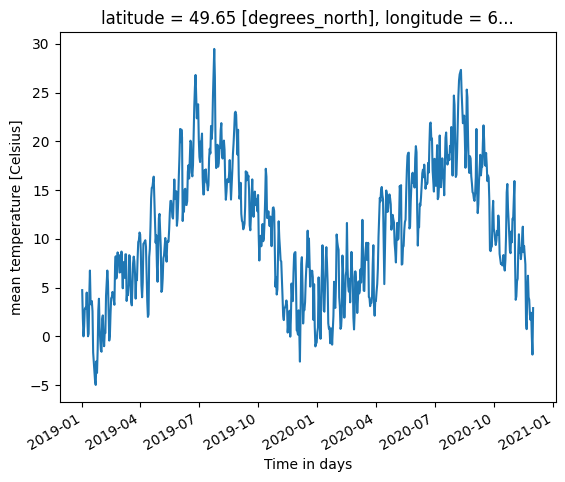

In [11]:
#subset by lat-lon:
TG_location = ds.tg.sel( longitude=lon,latitude=lat, method='nearest')
#subset by time:
Subset_time_and_loation= TG_location.sel(time=slice(Start_day, End_day))
#TG_location = TG.isel(X=6,Y=49)
Subset_time_and_loation.plot()

### Save to csv file

In [12]:
#export to csv-file:
# filename = city_code + '.csv'
# output_csv_file = result_path+"\\"+filename
# print(output_csv_file)
# Subset_time_and_loation.to_dataframe().to_csv(output_csv_file)
